# Sentiment Analysis with LSTM

# 0-) IMPORTS

In [1]:
import matplotlib.pyplot as plt
import tensorflow        as tf

from tensorflow.keras.datasets               import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models                 import Sequential
from tensorflow.keras.layers                 import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks              import EarlyStopping
from tensorflow.keras.optimizers             import Adam

# 1-) DATA ANALYSIS

In [2]:
max_features = 10000 # Most used 10.000 words
(X_train, y_train),(X_test, y_test) = imdb.load_data(num_words=max_features)

In [3]:
X_train[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
y_train[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

(25000,)
(25000,)
(25000,)
(25000,)
25000
25000
25000
25000


In [6]:
len(X_train[1])

189

##### To Enter Input Size, we need to make sentences of equal length with padding.

In [7]:
#Limit sentences with 100 words
maxlen=100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test  = pad_sequences(X_test , maxlen=maxlen)

In [8]:
len(X_train[1])

100

# 2-) MODELLING

In [14]:
def build_lstm_model():

    model = Sequential()
    model.add(Embedding(input_dim    = max_features,
                        output_dim   = 64,
                        input_length = maxlen))
    model.add(LSTM(units=256))
    model.add(Dropout(0.6))
    model.add(Dense(1, activation = "sigmoid"))

    #Compile
    model.compile(optimizer = Adam(learning_rate=1e-4),
              loss      = "binary_crossentropy",
              metrics   = [tf.keras.metrics.Precision(name="precision"),
                           tf.keras.metrics.Recall(name="recall"),
                           tf.keras.metrics.AUC(name="auc"),
                           "accuracy"])
    return model

In [15]:
model = build_lstm_model()

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
callbacks = [EarlyStopping(monitor              = "val_loss",
                           patience             = 15,
                           mode                 = 'min',
                           restore_best_weights = True)]

In [22]:
history = model.fit(x                = X_train,
                    y                = y_train,
                    epochs           = 100,
                    batch_size       = 256,
                    validation_split = 0.2,
                    callbacks        = callbacks)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 332ms/step - accuracy: 0.9144 - auc: 0.9667 - loss: 0.2344 - precision: 0.9185 - recall: 0.9106 - val_accuracy: 0.8302 - val_auc: 0.9134 - val_loss: 0.4064 - val_precision: 0.8222 - val_recall: 0.8372
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 348ms/step - accuracy: 0.9291 - auc: 0.9742 - loss: 0.2010 - precision: 0.9304 - recall: 0.9280 - val_accuracy: 0.8318 - val_auc: 0.9130 - val_loss: 0.4170 - val_precision: 0.8116 - val_recall: 0.8586
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 306ms/step - accuracy: 0.9345 - auc: 0.9756 - loss: 0.1935 - precision: 0.9384 - recall: 0.9311 - val_accuracy: 0.8186 - val_auc: 0.9066 - val_loss: 0.4875 - val_precision: 0.8201 - val_recall: 0.8104
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 292ms/step - accuracy: 0.9434 - auc: 0.9798 - loss: 0.1743 - precision: 0.9460 - recall: 0.9412 - val_accuracy: 0.8310 - val_auc: 0.9115 - val_loss: 0.4181 - val_precision: 0.8142 - val_recall: 0.8522
Epoch 5/100
79/79 ━━━━━━

# 3-) MODEL TESTING

In [23]:
def test_set_evaluate(model,X_test,y_test):
    test_loss, test_precision, test_recall, test_auc, test_accuracy = model.evaluate(X_test,y_test)

    print("\nTest Accuracy : %.6f%%" % (100.0 * test_accuracy))
    print("\nTest Loss     : %.6f%%" % (100.0 * test_loss))
    print("\nTest Precision: %.6f%%" % (100.0 * test_precision))
    print("\nTest Recall   : %.6f%%" % (100.0 * test_recall))
    print("\nTest AUC      : %.6f%%" % (100.0 * test_auc))

test_set_evaluate(model,X_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8273 - auc: 0.9093 - loss: 0.4173 - precision: 0.8216 - recall: 0.8295

Test Accuracy : 82.604003%

Test Loss     : 41.998976%

Test Precision: 82.523340%

Test Recall   : 82.727998%

Test AUC      : 90.850610%


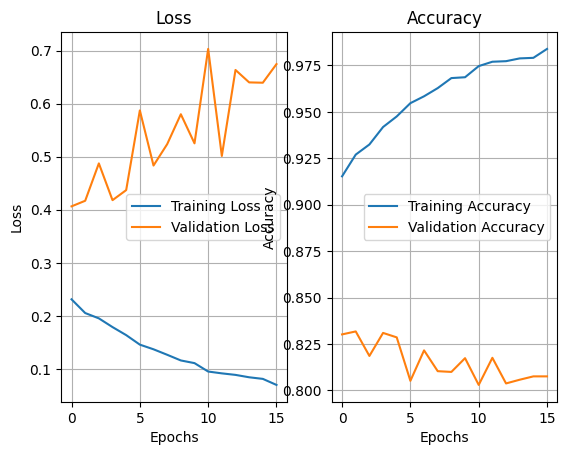

In [26]:
plt.subplot(1,2,1)
plt.plot(history.history["loss"], 
                         label = "Training Loss")
plt.plot(history.history["val_loss"], 
                         label = "Validation Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)

plt.plot(history.history["accuracy"], 
                         label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], 
                         label = "Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
